In [14]:
import numpy as np

def f(x, a, b):
    return (1 + np.exp(a+b))/(1 + np.exp(a/x + b))

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

a_ = np.linspace(0, 4, 4)
b_ = np.linspace(-2, 4, 4)

C:\anaconda3\envs\bayesian-network\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\anaconda3\envs\bayesian-network\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


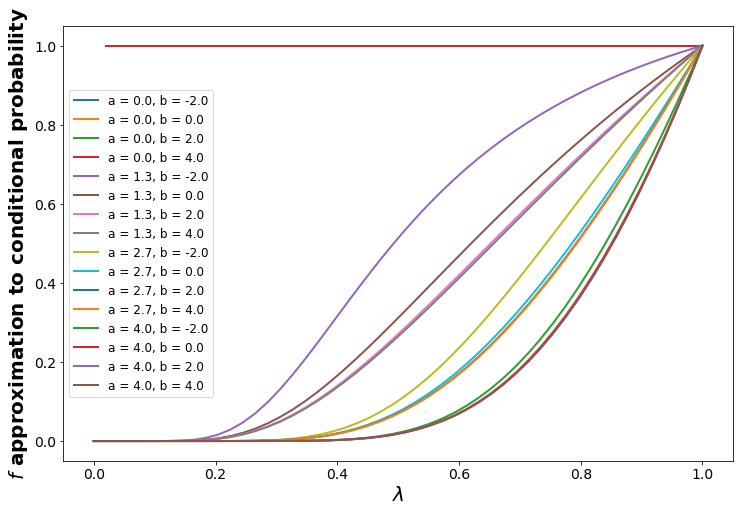

In [16]:
x = np.linspace(0, 1, 50)

plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
for a in a_:
    for b in b_:
        y = f(x, a, b)
        plt.plot(x, y, linewidth = 2, label = "a = " + str(round(a, 1)) + ", b = " + str(round(b, 1)))
        
plt.xlabel('$\lambda$', fontsize = 20, fontweight = 'bold')
plt.ylabel('$f$ approximation to conditional probability', fontsize = 20, fontweight = 'bold')

plt.legend(loc=0, prop={'size': 12})
ax.tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('CPT_function.pdf')

In [17]:
probs = np.array([0.00980392156862745, 0.0196078431372549, 0.029411764705882353, 0.0392156862745098, 
                  0.049019607843137254, 0.058823529411764705, 0.08823529411764706, 0.3137254901960784])

totalContr = 1.735294117647057

lambda_ = probs/totalContr

In [18]:
import scipy.stats

def obj(x):
    diff = (1 + np.exp(x[0]+x[1]))/(1 + np.exp(x[0]/lambda_ + x[1])) - probs
    return np.sum(diff**2)

def obj_normal(x):
    diff = scipy.stats.norm.cdf(lambda_, loc = x[0], scale = x[1]) - probs
    return np.sum(diff**2)

def obj_beta(x):
    diff = scipy.stats.beta.cdf(lambda_, a = x[0], b = x[1]) - probs
    return np.sum(diff**2)

def f_normal(x, a, b):
    return scipy.stats.norm.cdf(x, loc = a, scale = b)

def f_beta(x, a, b):
    return scipy.stats.beta.cdf(x, a = a, b = b)

In [19]:
from scipy.optimize import minimize

x_0 = [-1, 1]
res = minimize(obj, x_0, method='Powell', tol=1e-6)
res

   direc: array([[ 1.85046961e-04,  1.05517440e+00],
       [-6.13443246e-04,  1.17451918e+01]])
     fun: 0.014912498831008737
 message: 'Optimization terminated successfully.'
    nfev: 368
     nit: 10
  status: 0
 success: True
       x: array([ 0.24831556, 20.33325295])

#### Normal CDF to approximate conditional probabilities

In [20]:
x_0 = [3, 5]
res_normal = minimize(obj_normal, x_0, method='Powell', tol=1e-6)
res_normal

   direc: array([[ 0.       ,  1.       ],
       [-1.3413977, -0.8768285]])
     fun: 1.507112648981161
 message: 'Optimization terminated successfully.'
    nfev: 449
     nit: 8
  status: 0
 success: True
       x: array([-2.79797010e-01,  2.32930569e+16])

#### Beta CDF to approximate conditional probabilities

In [21]:
x_0 = [2, 1]
res_beta = minimize(obj_beta, x_0, method='Nelder-Mead', tol=1e-6)
res_beta

 final_simplex: (array([[1.04645351, 2.02591394],
       [1.04645345, 2.02591352],
       [1.04645331, 2.02591317]]), array([2.74086711e-06, 2.74086711e-06, 2.74086711e-06]))
           fun: 2.740867106258911e-06
       message: 'Optimization terminated successfully.'
          nfev: 120
           nit: 61
        status: 0
       success: True
             x: array([1.04645351, 2.02591394])

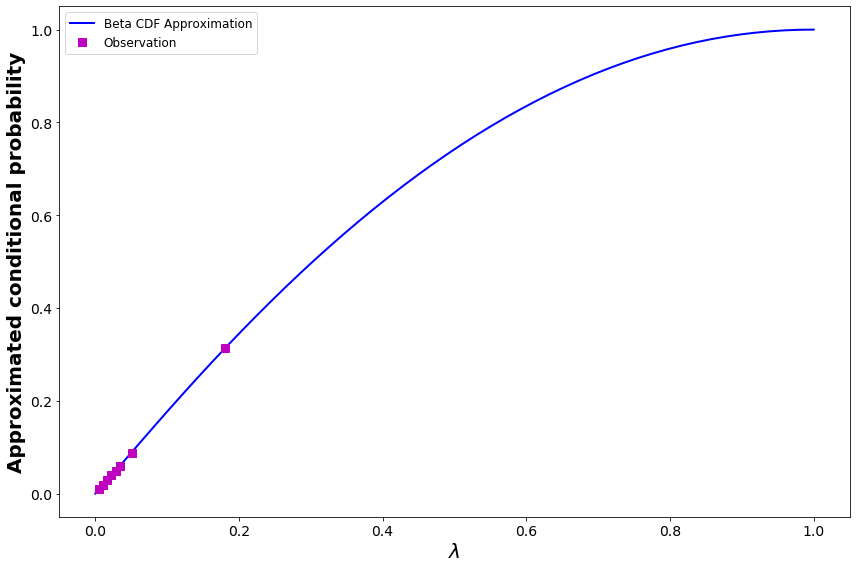

In [22]:
x__ = np.linspace(0, 1, 50)

plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

#a = res.x[0]
#b = res.x[1]
#plt.plot(x__, f(x__, a, b).flatten(), 'g', linewidth = '2', label = 'Proposed Approximation')


#a_normal = res_normal.x[0]
#b_normal = res_normal.x[1]
#plt.plot(x__, f_normal(x__, a_normal, b_normal).flatten(), 'r', linewidth = '2', label = 'Normal CDF Approximation')

a_beta = res_beta.x[0]
b_beta = res_beta.x[1]
plt.plot(x__, f_beta(x__, a_beta, b_beta).flatten(), 'b', linewidth = '2', label = 'Beta CDF Approximation')

plt.plot(lambda_, probs, 'ms', markersize = 8, label = 'Observation')

plt.xlabel('$\lambda$', fontsize = 20, fontweight = 'bold')
plt.ylabel('Approximated conditional probability', fontsize = 20, fontweight = 'bold')
plt.legend(loc=0, prop={'size': 12})
ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('cpt_demo.pdf')

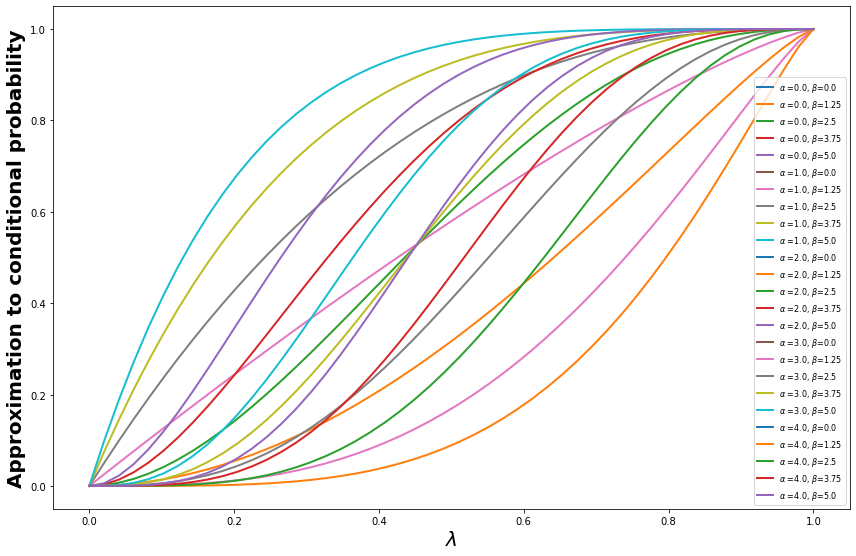

In [23]:
samples = np.linspace(0, 1, 50)

a = np.linspace(0, 4, 5)
b = np.linspace(0, 5, 5)

plt.figure(figsize=(12, 8))
for a_ in a:
    for b_ in b:
        plt.plot(samples, f_beta(x__, a_, b_).flatten(), linewidth = '2', label = r'$ \alpha $ =' +str(a_) + ', ' 
                 + r'$ \beta $=' + str(b_))
        
plt.xlabel('$\lambda$', fontsize = 20, fontweight = 'bold')
plt.ylabel('Approximation to conditional probability', fontsize = 20, fontweight = 'bold')
plt.legend(loc=4, prop={'size': 8})
ax.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('CPT_function.pdf')